In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

### 定义拟合函数及其残差函数

In [2]:
def circle_residuals(params,points):
    x0,y0,r = params
    residuals = []
    for point in points:
        residual = (point[0]-x0)**2+(point[1]-y0)**2-r**2
        residuals.append(residual)
    return residuals

def fit_circle(points):
    x_data = [point[0] for point in points ]
    y_data = [point[1] for point in points]
    # 初始估计值
    x0 = np.mean(x_data)
    y0 = np.mean(y_data)
    r = np.mean([np.sqrt((x-x0)**2+(y-y0)**2) for x,y in zip(x_data,y_data)])
    # 最小二乘法拟合
    params0 = [x0,y0,r]
    result = least_squares(circle_residuals,params0,args=(points,))
    x0_fit,y0_fit,r_fit = result.x
    # 计算弓形高度
    arc_height = abs(r_fit)-abs(y0_fit)
    # 计算弦长
    x_intersect_length = 2*math.sqrt(abs(r_fit)**2-(abs(r_fit)-abs(arc_height))**2)
    return x0_fit,y0_fit,abs(r_fit),arc_height,x_intersect_length

In [4]:
points = [(0,0),(3,1.19),(6,2.15),(9,2.82),(12,3.28),(15,3.53),(16.64,3.55),(18,3.54),(21,3.31),(24,2.89),(27,2.22),(30,1.29),(33.27,0)]
center_1,center_2,radius,arc_height,xianchang= fit_circle(points)
kg = 8.175
v = math.sqrt(kg*radius)
print(f"拟合圆的半径为:{radius}\n弓形高度为{arc_height}\n弦长为{xianchang}\n拟合圆的中心为{center_1,center_2}\n速度为{v}")

拟合圆的半径为:40.67788553908053
弓形高度为3.554144967069668
弦长为33.25767627917329
拟合圆的中心为(16.64079097607902, -37.12374057201086)
速度为18.235726316272224


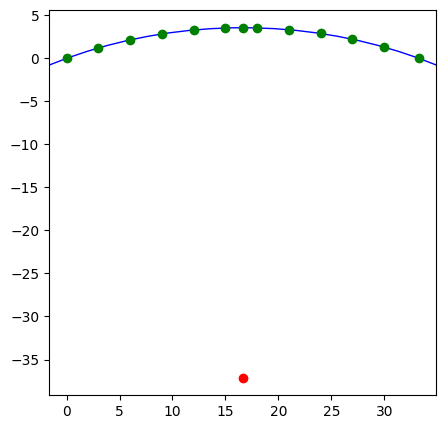

In [5]:
plt.figure(figsize=(5,5))
ax = plt.gca()
ax.plot([point[0] for point in points],[point[1] for point in points],'go',label="Original Points")
ax.plot(center_1,center_2, 'ro',label="Fitted Circle")
circle = plt.Circle((center_1,center_2), radius, color='b', fill=False)
ax.add_artist(circle)
plt.show()